In [2]:
import sys
sys.path.append('../../')

In [3]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from holisticai.explainability import Explainer
from holisticai.efficacy.metrics import regression_efficacy_metrics

In [4]:
dataset = load_diabetes() # load dataset

X = dataset.data # features
y = dataset.target # target 
feature_names = dataset.feature_names # feature names

X = pd.DataFrame(X, columns=feature_names) # convert to dataframe

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'bp'}>, <Axes: title={'center': 's1'}>,
        <Axes: title={'center': 's2'}>],
       [<Axes: title={'center': 's3'}>, <Axes: title={'center': 's4'}>,
        <Axes: title={'center': 's5'}>],
       [<Axes: title={'center': 's6'}>, <Axes: >, <Axes: >]], dtype=object)

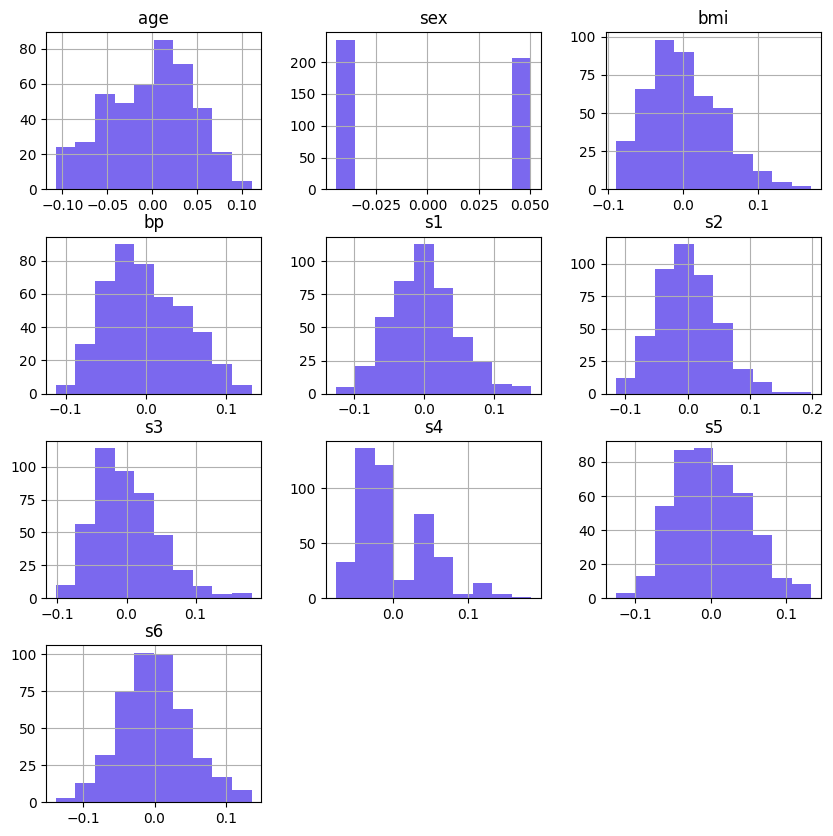

In [5]:
X.hist(bins=10, figsize=(10, 10), color = 'mediumslateblue')

<Axes: >

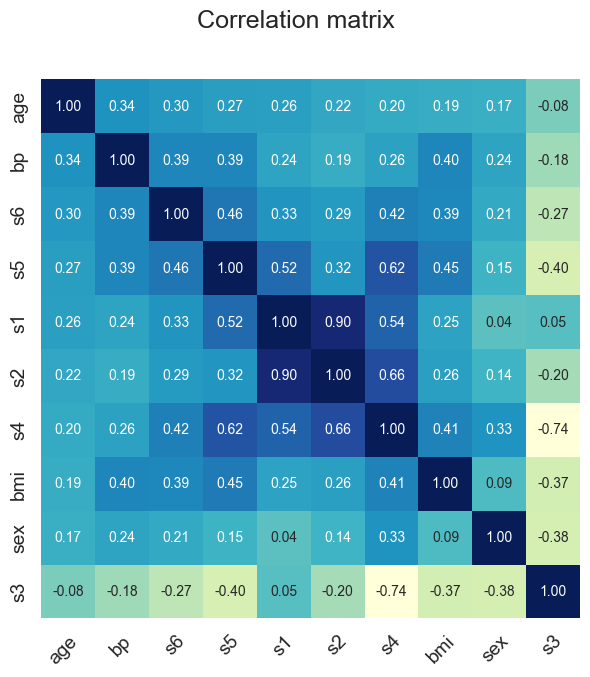

In [6]:
from holisticai.bias.plots import correlation_matrix_plot

correlation_matrix_plot(X, target_feature='age', size = (12,7))

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
seed = np.random.seed(42) # set seed for reproducibility
# simple preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed) # train test split


model = GradientBoostingRegressor() # instantiate model
model.fit(X_train, y_train) # fit model

y_pred = model.predict(X_test) # compute predictions

# compute efficacy metrics
regression_efficacy_metrics(y_test, y_pred)

,Value,Reference
Metric,,
RMSE,53.952020,0
MAE,44.638564,0
MAPE,0.399881,0
Max Error,131.736157,0
SMAPE,0.164915,0


# Global Explainability Metrics (based on Permutation Feature Importance)

In [10]:
# permutation feature importance
explainer = Explainer(based_on='feature_importance',
                      strategy_type='permutation',
                      model_type='regression',
                      model = model, 
                      x = X, 
                      y = y)

In [11]:
explainer.metrics()

,Value,Reference
Fourth Fifths,0.400000,0
Importance Spread Divergence,0.460785,-
Importance Spread Ratio,0.799884,0
Global Overlap Score,0.306776,1
Global Range Overlap Score,0.752946,1
Global Similarity Score,0.840495,1
Global Explainability Score,0.750000,1


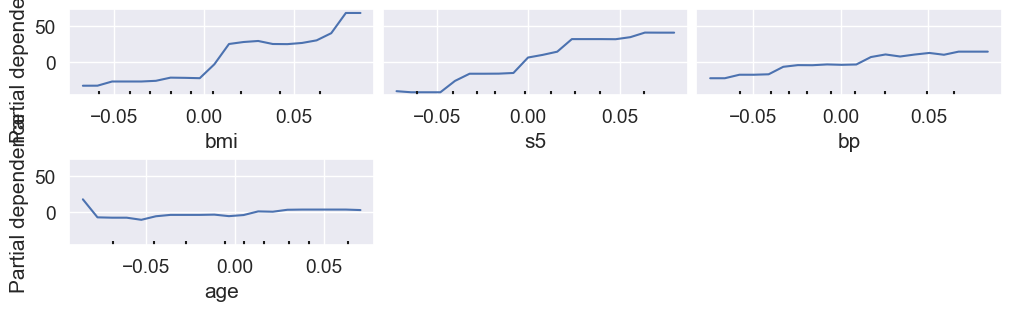

In [12]:
explainer.partial_dependence_plot()

In [13]:
explainer.metrics(detailed=True)

,Value,Reference
Fourth Fifths,0.400000,0
Importance Spread Divergence,0.460785,-
Importance Spread Ratio,0.799884,0
Global Overlap Score [Q0-Q1],0.031111,1
Global Overlap Score [Q1-Q2],0.485794,1
Global Overlap Score [Q2-Q3],0.047897,1
Global Overlap Score [Q3-Q4],0.662302,1
Global Range Overlap Score [Q0-Q1],0.704048,1
Global Range Overlap Score [Q1-Q2],0.799484,1
Global Range Overlap Score [Q2-Q3],0.607817,1


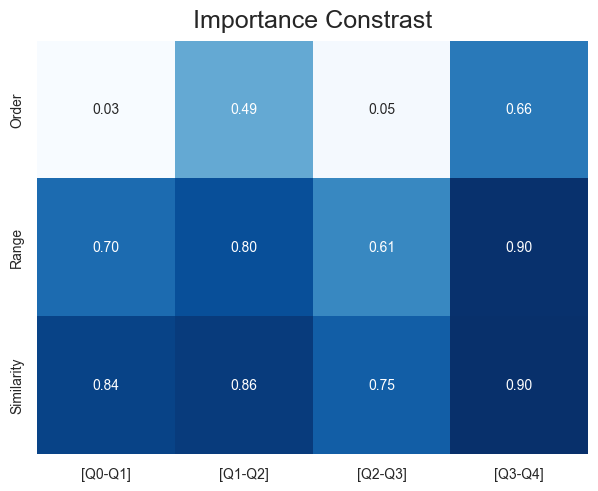

In [14]:
# How change the feature importance for each quantil with respect to the feature importance of the whole model?
explainer.contrast_visualization(show_connections=False)

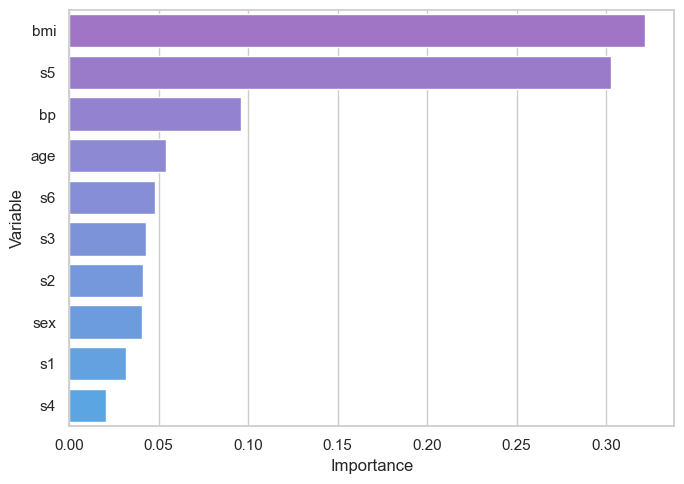

In [15]:
explainer.bar_plot(max_display=10)

# Global Explainability metrics (based on Surrogate Model)

In [16]:
# surrogate feature importance
explainer = Explainer(based_on='feature_importance',
                      strategy_type='surrogate',
                      model_type='regression',
                      model = model, 
                      x = X, 
                      y = y)

In [17]:
explainer.metrics()

,Value,Reference
Fourth Fifths,0.100000,0
Importance Spread Divergence,1.533691,-
Importance Spread Ratio,0.333927,0
Global Explainability Score,0.750000,1
Surrogate Efficacy Regression,0.163279,0


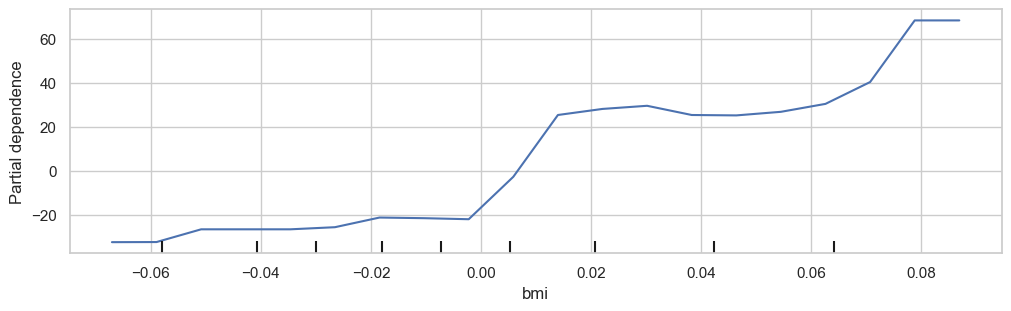

In [18]:
explainer.partial_dependence_plot()

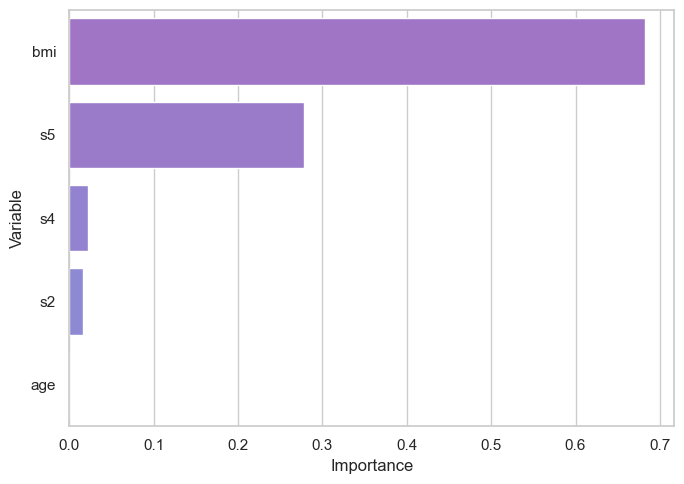

In [19]:
explainer.bar_plot(max_display=5)

[Text(0.5, 0.875, 'bmi <= 0.005\nsquared_error = 3735.101\nsamples = 442\nvalue = 152.776'),
 Text(0.25, 0.625, 's5 <= -0.0\nsquared_error = 1846.149\nsamples = 265\nvalue = 119.944'),
 Text(0.125, 0.375, 's5 <= -0.043\nsquared_error = 700.415\nsamples = 176\nvalue = 98.632'),
 Text(0.0625, 0.125, 'squared_error = 358.895\nsamples = 65\nvalue = 82.997'),
 Text(0.1875, 0.125, 'squared_error = 673.434\nsamples = 111\nvalue = 107.788'),
 Text(0.375, 0.375, 's4 <= 0.09\nsquared_error = 1437.588\nsamples = 89\nvalue = 162.088'),
 Text(0.3125, 0.125, 'squared_error = 1169.109\nsamples = 83\nvalue = 157.351'),
 Text(0.4375, 0.125, 'squared_error = 546.461\nsamples = 6\nvalue = 227.621'),
 Text(0.75, 0.625, 'bmi <= 0.073\nsquared_error = 2533.134\nsamples = 177\nvalue = 201.931'),
 Text(0.625, 0.375, 's5 <= 0.017\nsquared_error = 1922.039\nsamples = 147\nvalue = 190.096'),
 Text(0.5625, 0.125, 'squared_error = 1234.415\nsamples = 67\nvalue = 164.965'),
 Text(0.6875, 0.125, 'squared_error = 152

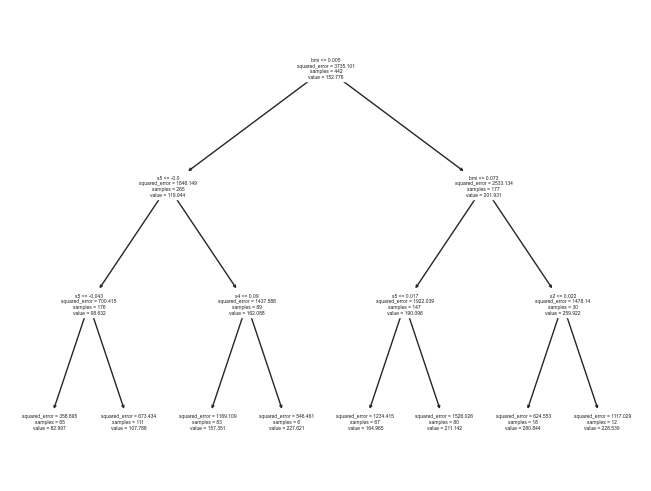

In [20]:
explainer.tree_visualization('sklearn')

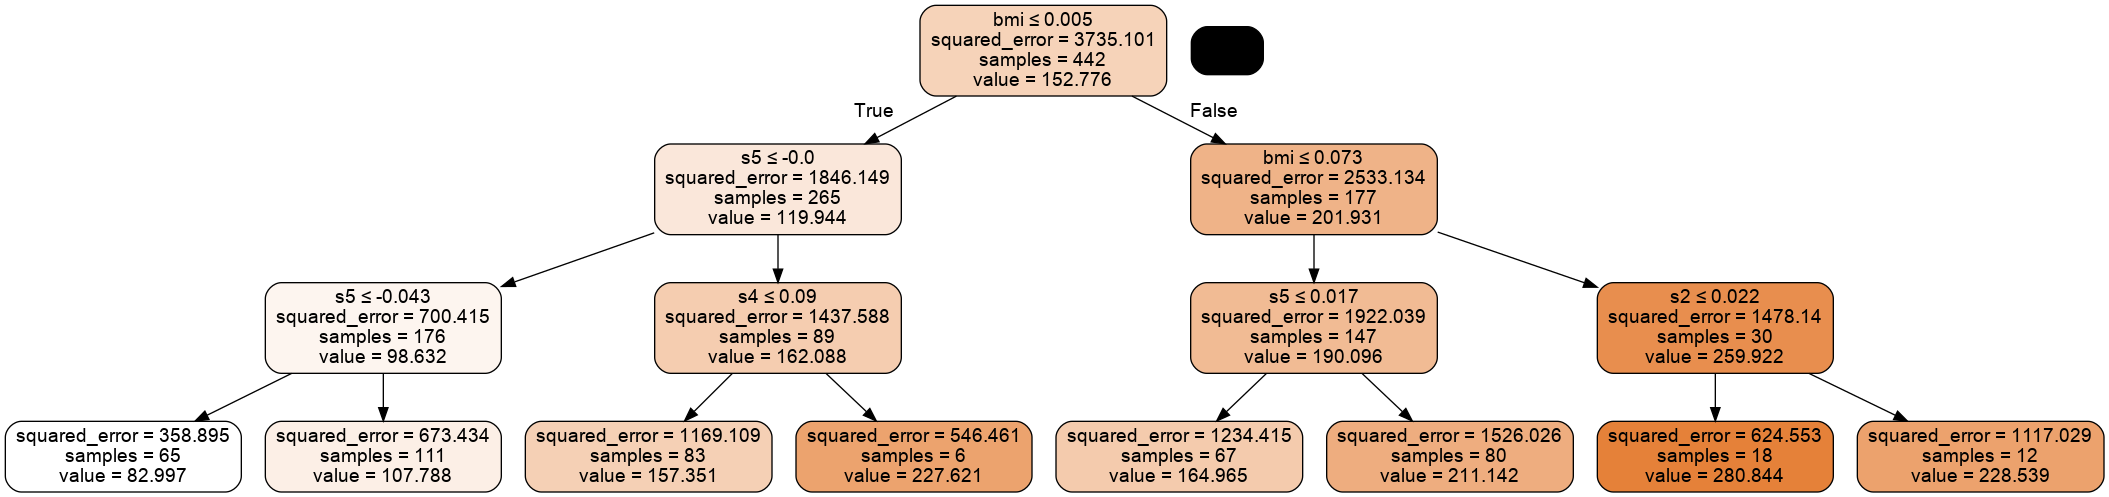

In [21]:
explainer.tree_visualization('graphviz')

# Local Explainability Metrics (based on Lime)

In [23]:
# lime feature importance
explainer = Explainer(based_on='feature_importance',
                      strategy_type='lime',
                      model_type='regression',
                      model = model, 
                      x = X, 
                      y = y)

100%|██████████| 4/4 [00:03<00:00,  1.13it/s]


In [24]:
explainer.metrics()

,Value,Reference
Dataset Spread Divergence,0.073072,0
Dataset Spread Mean,0.348830,0
Dataset Spread Stability,0.987999,1
Features Spread Divergence,0.032869,0
Features Spread Mean,0.246540,0
Features Spread Stability,0.985725,1


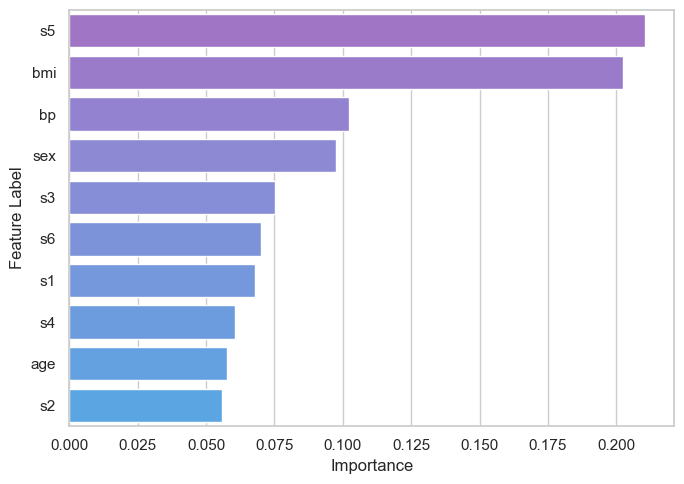

In [26]:
explainer.bar_plot(max_display=10)

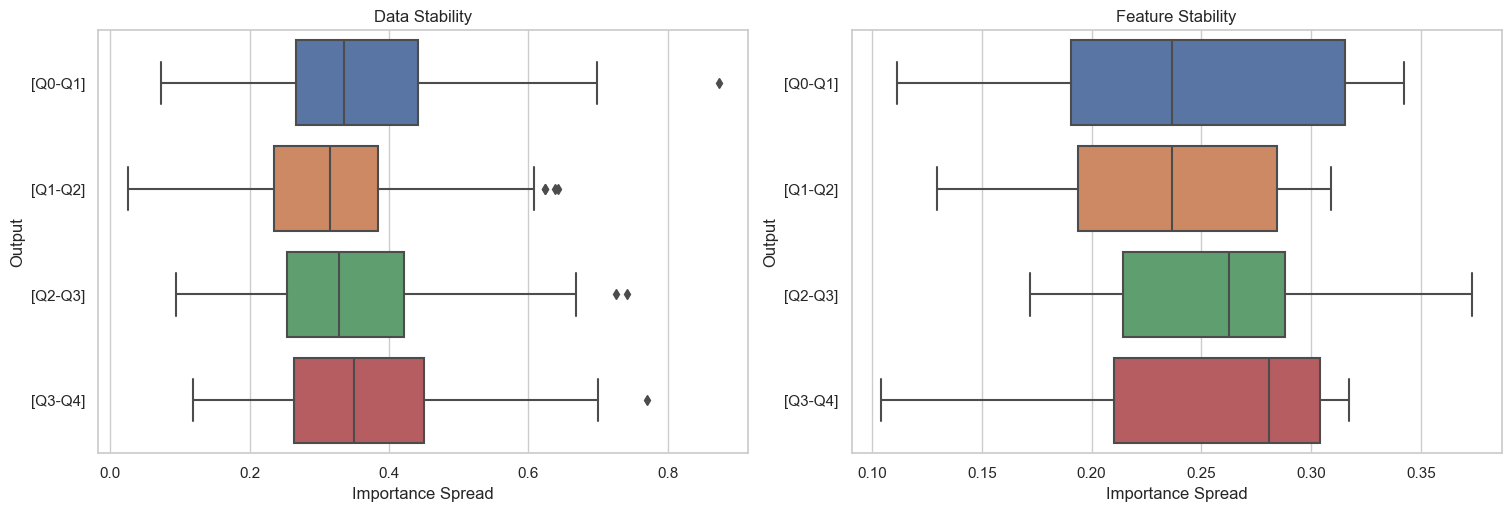

In [27]:
explainer.show_importance_stability()